# LangChain: Memory

## Outline
* ConversationBufferMemory
* ConversationBufferWindowMemory
* ConversationTokenBufferMemory
* ConversationSummaryMemory

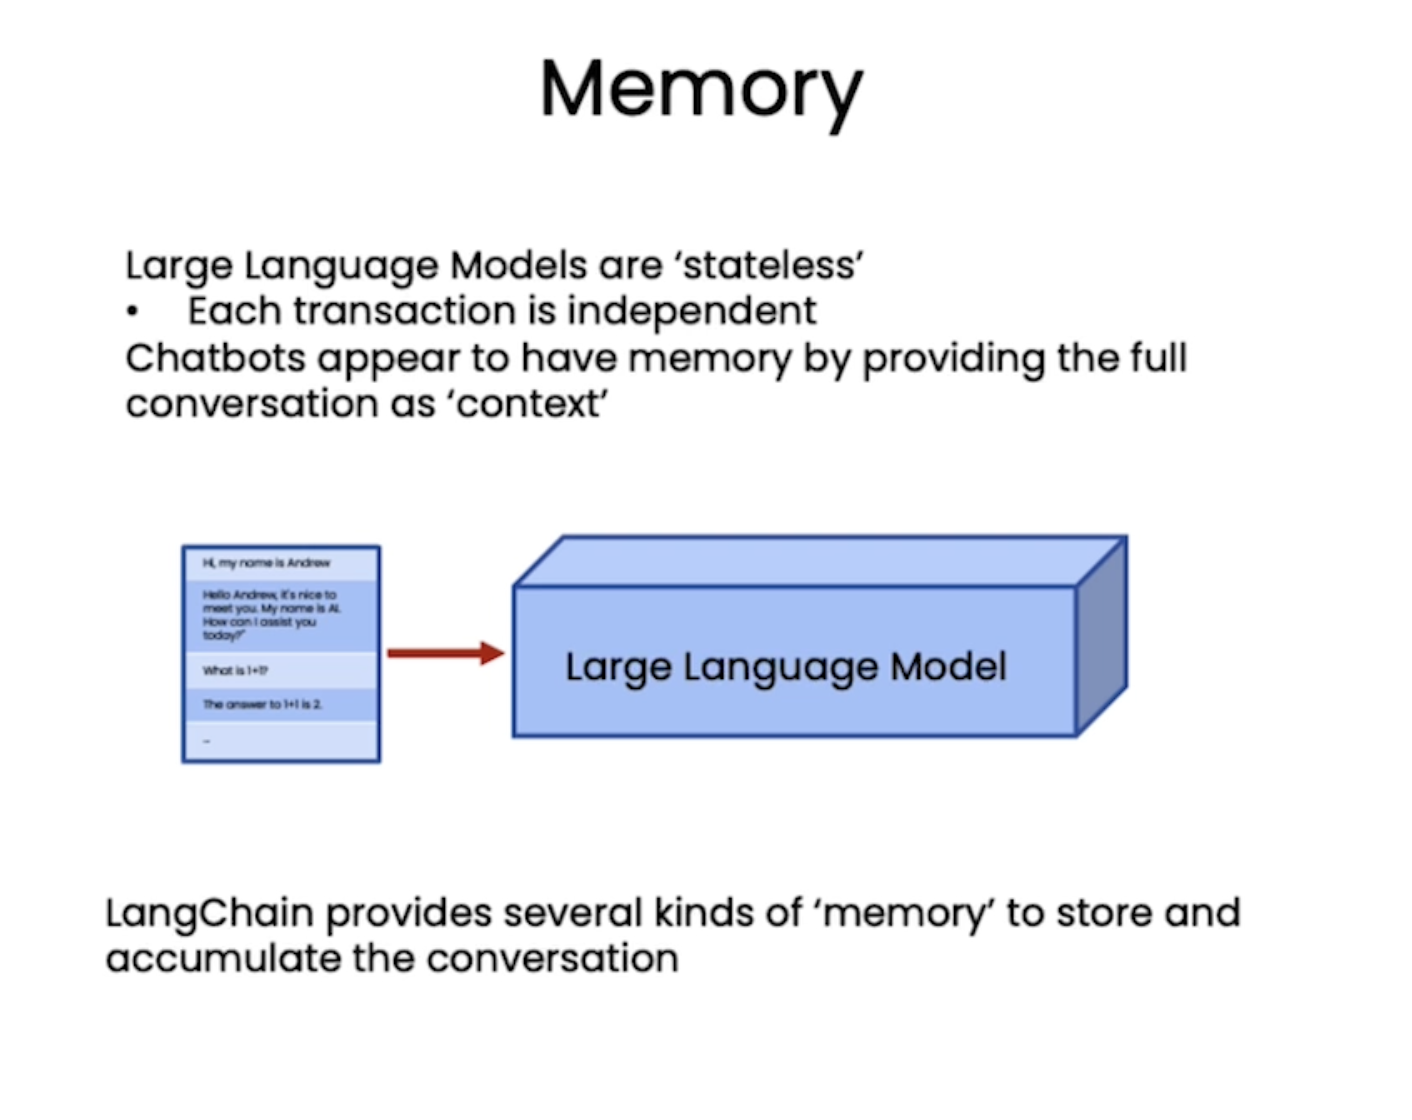

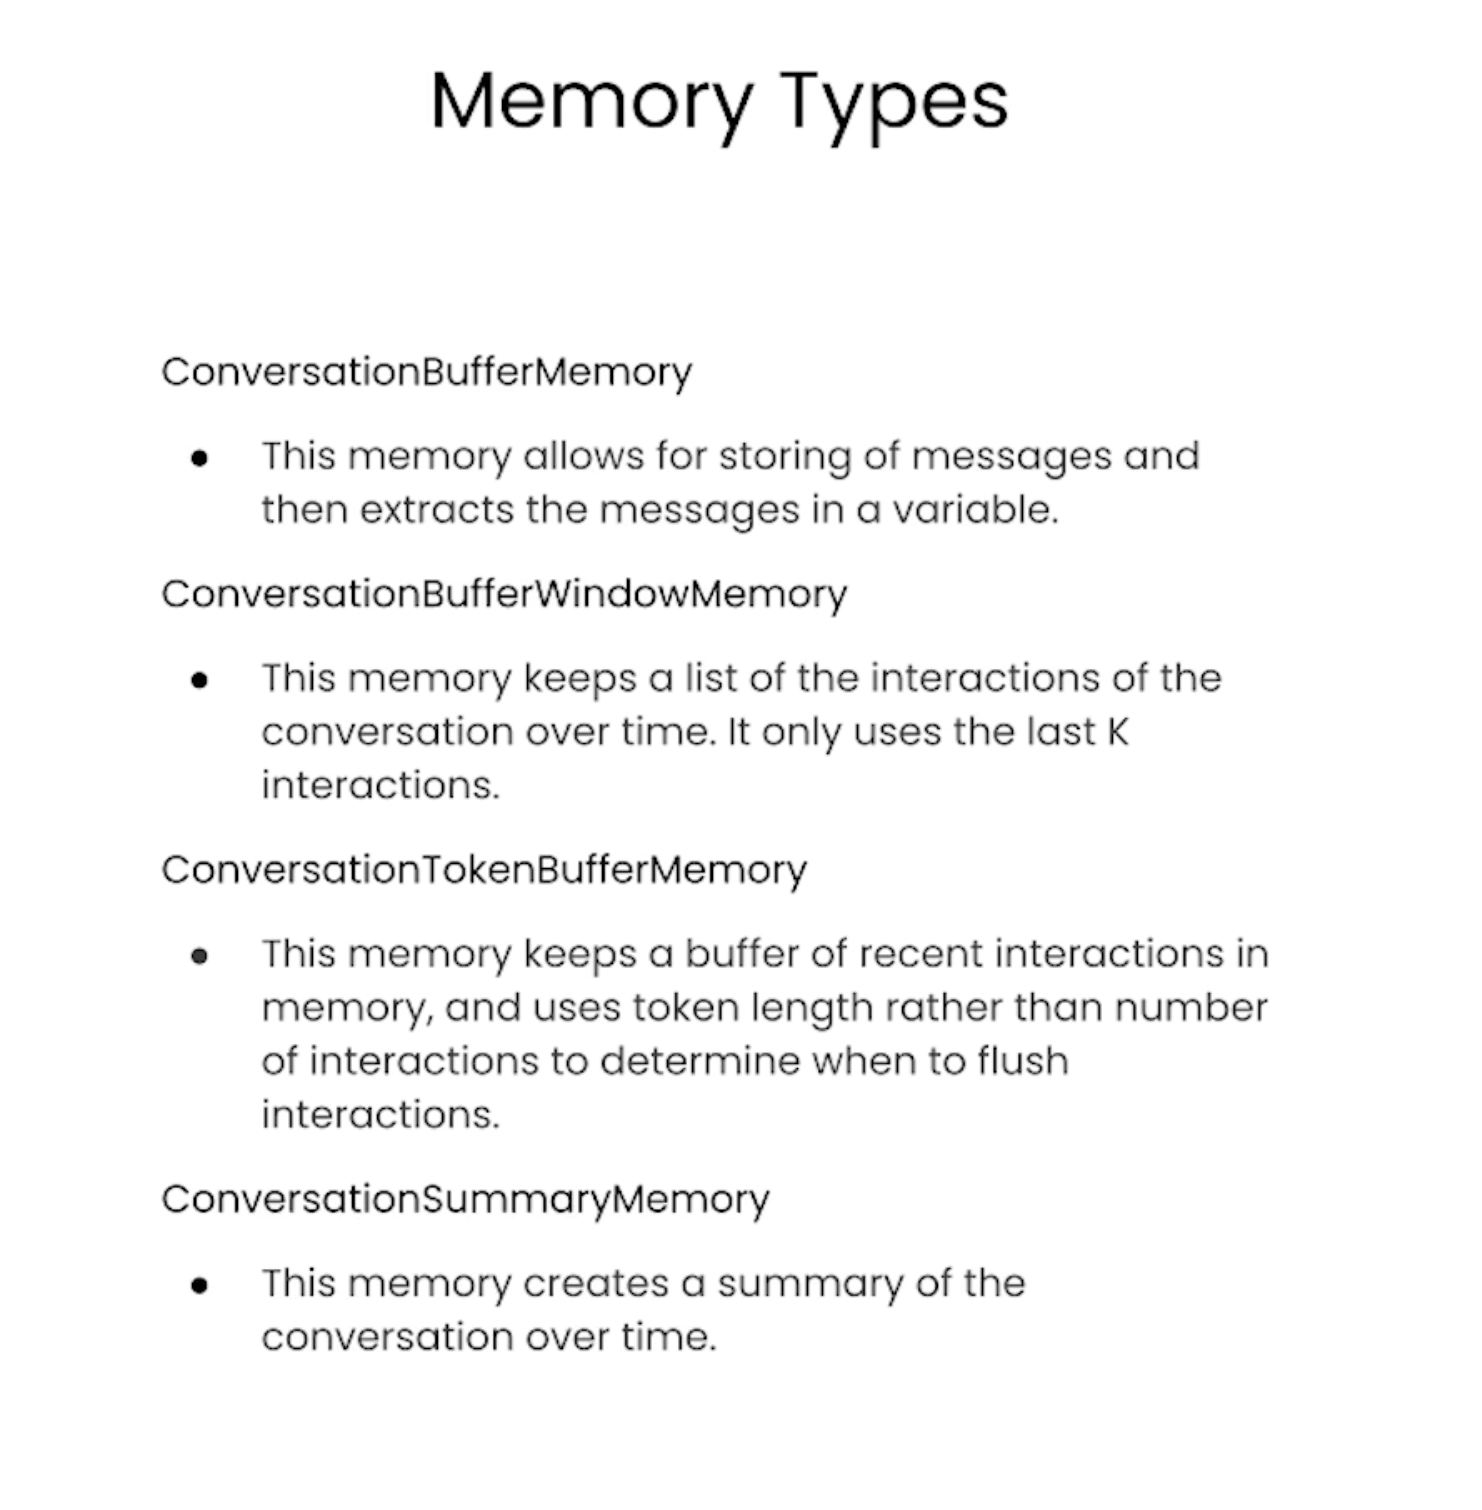

In [41]:
import os
os.environ['OPENAI_API_KEY']="sk-"

In [2]:
!pip install --upgrade langchain
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.2/806.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.4/252.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 16.9 MB/s eta 0:00:00


## ConversationBufferMemory

In [3]:
import os

# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # read local .env file

import warnings
warnings.filterwarnings('ignore')

In [4]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory


In [7]:
llm = ChatOpenAI(temperature=0.0)
memory = ConversationBufferMemory()
conversation = ConversationChain(
    llm=llm,
    memory = memory,
    verbose=True
)

In [8]:
conversation.predict(input="Hi, my name is Andrew")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Andrew
AI:

> Finished chain.


"Hello Andrew! It's nice to meet you. How can I assist you today?"

In [9]:
conversation.predict(input="What is 1+1?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Andrew
AI: Hello Andrew! It's nice to meet you. How can I assist you today?
Human: What is 1+1?
AI:

> Finished chain.


'1+1 equals 2. Is there anything else you would like to know?'

In [10]:
conversation.predict(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Andrew
AI: Hello Andrew! It's nice to meet you. How can I assist you today?
Human: What is 1+1?
AI: 1+1 equals 2. Is there anything else you would like to know?
Human: What is my name?
AI:

> Finished chain.


'Your name is Andrew. Is there anything else you would like to know or discuss?'

In [11]:
print(memory.buffer)

Human: Hi, my name is Andrew
AI: Hello Andrew! It's nice to meet you. How can I assist you today?
Human: What is 1+1?
AI: 1+1 equals 2. Is there anything else you would like to know?
Human: What is my name?
AI: Your name is Andrew. Is there anything else you would like to know or discuss?


In [12]:
memory.load_memory_variables({})

{'history': "Human: Hi, my name is Andrew\nAI: Hello Andrew! It's nice to meet you. How can I assist you today?\nHuman: What is 1+1?\nAI: 1+1 equals 2. Is there anything else you would like to know?\nHuman: What is my name?\nAI: Your name is Andrew. Is there anything else you would like to know or discuss?"}

In [13]:
memory = ConversationBufferMemory()

In [14]:
memory.save_context({"input": "Hi"},
                    {"output": "What's up"})

In [15]:
print(memory.buffer)

Human: Hi
AI: What's up


In [16]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up"}

In [17]:
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})

In [18]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up\nHuman: Not much, just hanging\nAI: Cool"}

## ConversationBufferWindowMemory

In [19]:
from langchain.memory import ConversationBufferWindowMemory

In [20]:
memory = ConversationBufferWindowMemory(k=1)

In [21]:
memory.save_context({"input": "Hi"},
                    {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})


In [22]:
memory.load_memory_variables({})

{'history': 'Human: Not much, just hanging\nAI: Cool'}

In [27]:
llm = ChatOpenAI(temperature=0.0)
memory = ConversationBufferWindowMemory(k=1)
conversation = ConversationChain(
    llm=llm,
    memory = memory,
    verbose=False
)

In [28]:
conversation.predict(input="Hi, my name is Andrew")

"Hello Andrew! It's nice to meet you. How can I assist you today?"

In [29]:
conversation.predict(input="What is 1+1?")

'1+1 equals 2. Is there anything else you would like to know?'

In [30]:
conversation.predict(input="What is my name?")

'Your name is Andrew. Is there anything else you would like to know or discuss?'

## ConversationTokenBufferMemory

In [31]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.1 MB/s eta 0:00:00


In [32]:
from langchain.memory import ConversationTokenBufferMemory
from langchain.llms import OpenAI
llm = ChatOpenAI(temperature=0.0)

In [33]:
memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=30)
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"},
                    {"output": "Charming!"})

In [34]:
memory.load_memory_variables({})

{'history': 'AI: Beautiful!\nHuman: Chatbots are what?\nAI: Charming!'}

## ConversationSummaryMemory

In [35]:
from langchain.memory import ConversationSummaryBufferMemory


In [36]:
# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory.save_context({"input": "What is on the schedule today?"},
                    {"output": f"{schedule}"})

In [37]:
memory.load_memory_variables({})

{'history': "System: The human and AI exchange greetings and discuss the day's schedule. The AI informs the human of a morning meeting with the product team, work on the LangChain project, and a lunch meeting with a customer interested in AI. The AI emphasizes the importance of being prepared for the day's events."}

In [38]:
conversation = ConversationChain(
    llm=llm,
    memory = memory,
    verbose=True
)

In [39]:
conversation.predict(input="What would be a good demo to show?")


> Finished chain.


"For the morning meeting with the product team, a demo showcasing the latest features and updates on the LangChain project would be ideal. This could include a live demonstration of how the language processing algorithms work and the improvements made to enhance user experience. Additionally, for the lunch meeting with the customer interested in AI, a demo highlighting the capabilities of our AI technology and how it can be customized to meet their specific needs would be impressive. It's important to tailor the demos to each audience to showcase the value and potential of our products."

In [40]:
memory.load_memory_variables({})

{'history': "System: The human and AI discuss the day's schedule, including a morning meeting with the product team, work on the LangChain project, and a lunch meeting with a customer interested in AI. The AI emphasizes the importance of being prepared and suggests tailored demos for each meeting to showcase the latest features and updates on the LangChain project, as well as the capabilities of their AI technology."}

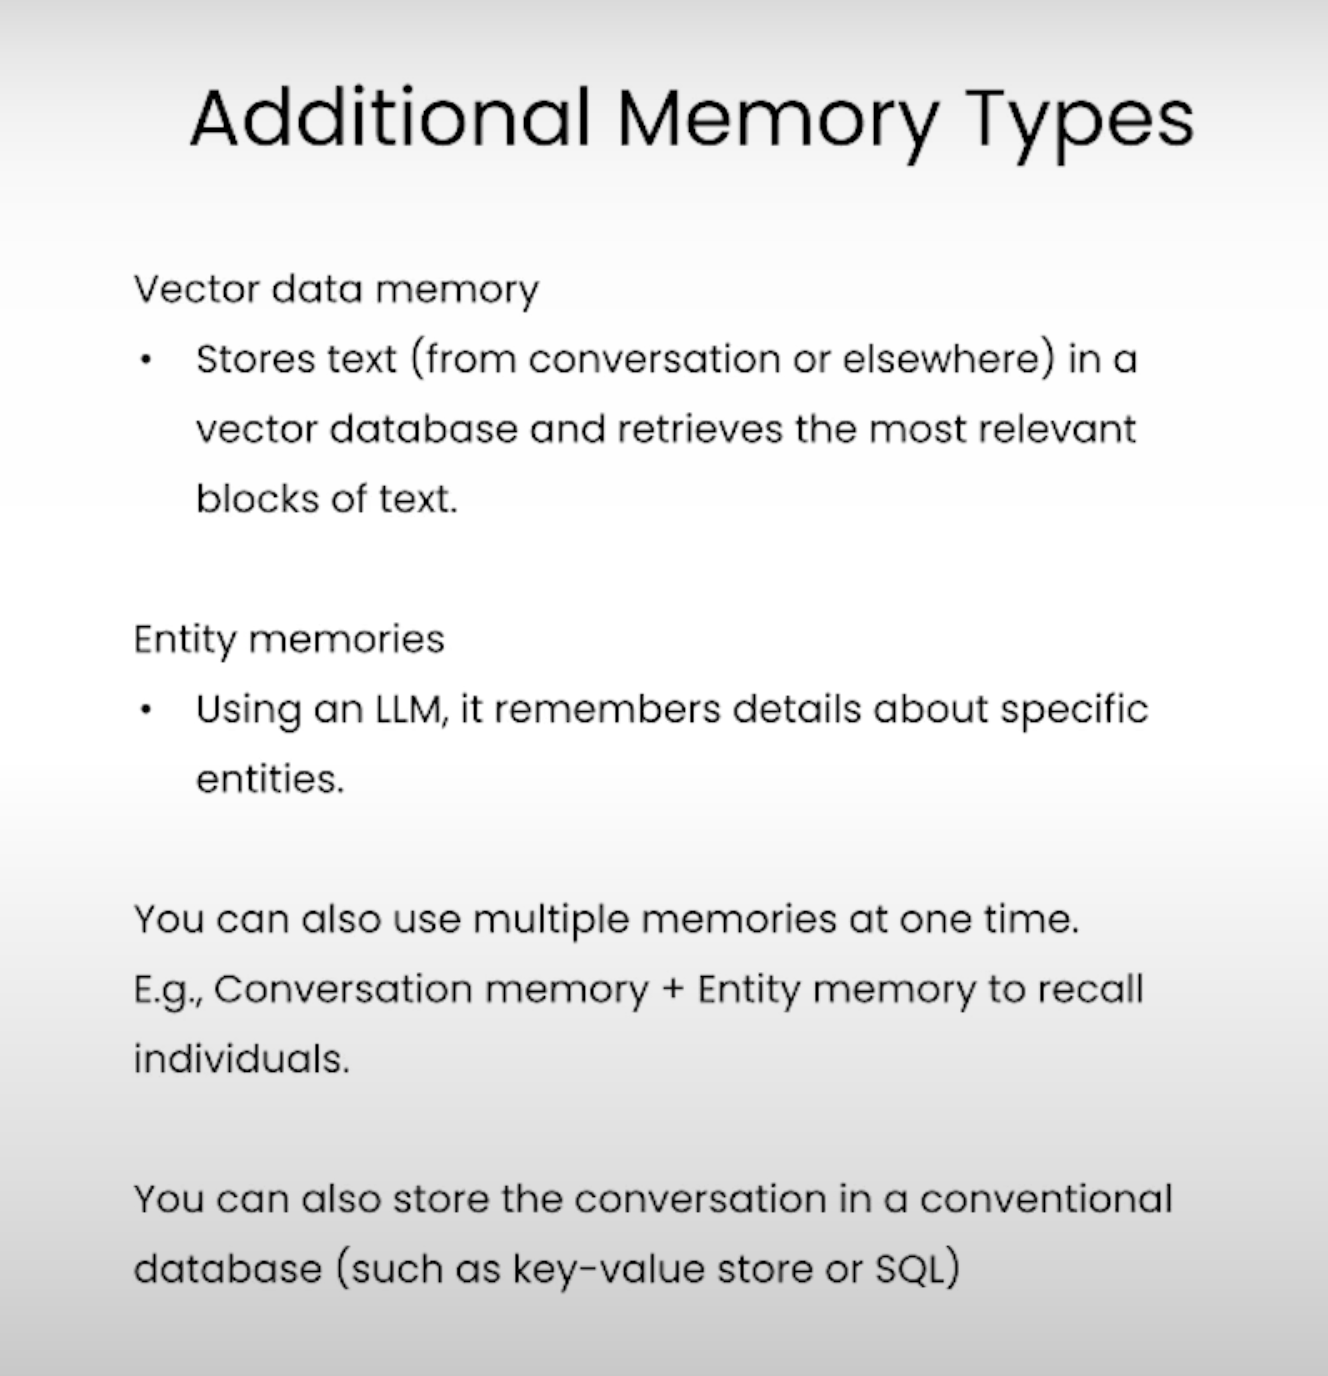